<a href="https://colab.research.google.com/github/Nwachukwu-Victor/Task-Code-2.3---Botany-and-Plant-Science/blob/main/Copy_of_Botany_and_Plant_science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task Code 2.3 - Botany and Plant Science**

Scientists are engineering mutant crops to resist a pesticide and want to compare their metabolic response to wild-type (WT) plants. They measured metabolic changes at 8 hours and 24 hours after treatment.

**My Task:**

1.Calculate the metabolic response difference (ΔM) between the DMSO control and the 24-hour treatment for both WT and mutant plants.

2.Create a scatter plot of ΔM for WT vs. mutants.

3.Fit a line with a y-intercept of 0 and a slope of 1.

4.Calculate residuals (the difference between each point and the fitted line).

4.Color the metabolites based on residuals:

Within ±n cutoff → Grey

Outside ±n cutoff → Salmon

5.Identify and analyze the outliers (metabolites that fall outside the range).

6.Pick 6 outlier metabolites and create a line plot showing their metabolic changes over time (0h → 8h → 24h).

STEP 1: Had  to take the raw code and converted it to a CSV(comma seperated value) file before importing the file to begin the analysis.

In [ ]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


DISPLAYING MY DATA-SET

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_rows', None)
file_path = "/content/drive/MyDrive/botanydata2.csv"
pd.read_csv(file_path)
df = pd.read_csv(file_path)
print(df)


            Metabolites  acetylcarnitine  aconitic_acid   adenine  adenosine_cyclic_monophosphate  adenosine_monophosphate  adenosine_triphosphate  adipic_acid  allantoin  alpha_ketoglutaric_acid  aminoadipic_acid  arabitol   arginine  argininosuccinic_acid  asparagine  aspartic_acid  butyrylcarnitine  carnitine  citramalic_acid  citric_acid_isocitric_acid  citrulline   creatine  creatine_phosphate  creatinine  cystathionine   cystine  cytidine_triphosphate  deoxy_methylthio_adenosine  deoxyadenosine_triphosphate  deoxycytidine_monophosphate  deoxythymidine_triphosphate  deoxyuridine  dihydroxyacetone_phosphate  dihydroxyisovalerate  flavin_adenine_dinucleotide  folic_acid  fructose_1_6_biphosphate  gamma_glu_cys  glutamic_acid  glutamine  gluthathione_oxidized  glyceric_acid    glycine  guanosine  guanosine_triphosphate     hexose  hexose_1_phosphate  hexose_6_phosphate  histidine  homocitrate  homoserine  hydroxy_glutamic_acid  hydroxyglutaric_acid  hypoxanthine  inosine_monophosphat

Google colab lets you view your data set without having to use the print function and that is what I did below by calling the data frame.


In [ ]:
df

,Metabolites,acetylcarnitine,aconitic_acid,adenine,adenosine_cyclic_monophosphate,adenosine_monophosphate,adenosine_triphosphate,adipic_acid,allantoin,alpha_ketoglutaric_acid,aminoadipic_acid,arabitol,arginine,argininosuccinic_acid,asparagine,aspartic_acid,butyrylcarnitine,carnitine,citramalic_acid,citric_acid_isocitric_acid,citrulline,creatine,creatine_phosphate,creatinine,cystathionine,cystine,cytidine_triphosphate,deoxy_methylthio_adenosine,deoxyadenosine_triphosphate,deoxycytidine_monophosphate,deoxythymidine_triphosphate,deoxyuridine,dihydroxyacetone_phosphate,dihydroxyisovalerate,flavin_adenine_dinucleotide,folic_acid,fructose_1_6_biphosphate,gamma_glu_cys,glutamic_acid,glutamine,gluthathione_oxidized,glyceric_acid,glycine,guanosine,guanosine_triphosphate,hexose,hexose_1_phosphate,hexose_6_phosphate,histidine,homocitrate,homoserine,hydroxy_glutamic_acid,hydroxyglutaric_acid,hypoxanthine,inosine_monophosphate,inosine_triphosphate,isoleucine,itaconic_acid,ketobutyrate,ketovaleric_acid,lactic_acid,leucine,maleic_acid,malic_acid,methionine,myristoylcarnitine,n_acetylglutamic_acid,n_acetylneuraminic_acid,n_carbamoyl_aspartic_acid,n_carbamyl_glutamic_acid,nicotinamide_adenine_dinucleotide,o_phosphorylethanolamine,orotic_acid,oxamic_acid,pantothenic_acid,pentahydroxyhexanoic_acid,pentose,phenolred,phenylalanine,phenylpyruvic_acid,phospho_serine,phosphoenolpyruvic_acid,pyridoxal_5_phosphate,pyridoxal_hydrochloride,pyridoxic_acid,pyridoxine,pyruvic_acid,riboflavin,ribose_5_phosphate,salicylic_acid,serine,succinic_acid,taurine,taurocholic_acid,thiamine,threonine,tryptophan,tyrosine,uracil,uric_acid,uridine,uridine_diphosphohexose,uridine_monophosphate,uridine_triphosphate,valine,xanthine,xanthosine,xylitol,xylulose_5_phosphate
0,WT_DMSO,7.000000,-19.447639,-0.066413,-1.917890,2.967939,12.728842,1.165878,7.151822,3.897284,6.566451,3.130301,10.787883,4.529373,8.035990,12.487809,6.450711,8.292781,2.169573,2.775294,4.406388,12.142127,10.992337,6.502711,9.803748,8.805363,7.723141,0.404038,6.573615,2.310092,6.156368,0.066343,9.437772,-0.713532,4.766782,2.320099,7.962359,7.788644,14.895454,15.070492,8.246361,2.230973,13.264476,0.500000,8.843625,15.514073,4.693616,8.027299,10.073570,-0.982020,6.586799,2.474427,2.889465,5.410297,3.276224,7.366708,11.890340,8.858150,7.759830,8.054341,12.764220,11.655896,14.172738,6.789769,10.223134,5.293258,1.624637,4.845683,3.861187,-1.441452,9.129678,6.627830,-1.300000,0.173258,8.593992,6.685575,14.156271,6.665275,11.275213,-2.049135,13.438842,4.275367,2.860044,0.667072,-1.156050,5.580222,7.178997,1.651305,6.171647,2.935759,12.244488,6.684446,12.753278,0.258988,10.156382,12.983690,8.636991,11.170423,3.097707,2.575356,3.013875,9.541007,4.607716,9.069961,12.140469,3.880476,-0.917890,5.148667,7.900345
1,WT_pesticide_0h,7.035531,-19.445951,-0.363286,-1.700000,5.340498,12.718995,1.136285,6.941596,4.398953,6.442069,3.019524,10.150084,4.174267,7.736832,12.287499,7.747670,8.318740,2.040828,2.359933,0.801101,12.227632,12.192844,6.534455,8.509150,7.721889,7.907291,0.378646,5.869507,2.820392,5.548984,0.801101,10.536318,-0.935865,4.978405,1.553520,8.897755,7.558760,14.741591,14.448607,8.531061,2.254466,12.957687,0.649098,8.833380,15.262972,4.647555,8.072851,9.840758,-0.338624,6.300000,2.540284,2.652177,5.428438,3.323697,6.806293,12.019361,8.542931,7.700000,7.367330,12.972800,11.502274,14.328739,6.891010,9.824471,6.000000,1.162437,4.782251,4.120808,-1.520827,9.317013,6.180412,-1.413912,2.897674,8.552387,6.787512,13.775679,6.395511,11.018117,-1.973340,13.467502,4.719047,2.905437,0.506653,-2.520827,5.087641,7.328397,0.533620,6.409000,3.145055,11.805797,6.392062,12.728520,0.221676,10.052255,12.610788,7.814563,10.705770,2.781548,2.563368,2.825857,9.418045,6.860882,9.001867,11.849802,3.716842,-0.761835,5.937027,8.535654
2,WT_pesticide_8h,6.773425,-19.443194,0.048875,-1.632303,3.705703,12.705989,0.689625,6.647828,4.152670,6.396937,3.208421,10.417980,4.168820,7.894230,12.305860,7.384601,7.762455,1.684642,2.241035,2.697068,12

Here I want to know the statistical value of my data set.

In [ ]:
df.describe()



,acetylcarnitine,aconitic_acid,adenine,adenosine_cyclic_monophosphate,adenosine_monophosphate,adenosine_triphosphate,adipic_acid,allantoin,alpha_ketoglutaric_acid,aminoadipic_acid,arabitol,arginine,argininosuccinic_acid,asparagine,aspartic_acid,butyrylcarnitine,carnitine,citramalic_acid,citric_acid_isocitric_acid,citrulline,creatine,creatine_phosphate,creatinine,cystathionine,cystine,cytidine_triphosphate,deoxy_methylthio_adenosine,deoxyadenosine_triphosphate,deoxycytidine_monophosphate,deoxythymidine_triphosphate,deoxyuridine,dihydroxyacetone_phosphate,dihydroxyisovalerate,flavin_adenine_dinucleotide,folic_acid,fructose_1_6_biphosphate,gamma_glu_cys,glutamic_acid,glutamine,gluthathione_oxidized,glyceric_acid,glycine,guanosine,guanosine_triphosphate,hexose,hexose_1_phosphate,hexose_6_phosphate,histidine,homocitrate,homoserine,hydroxy_glutamic_acid,hydroxyglutaric_acid,hypoxanthine,inosine_monophosphate,inosine_triphosphate,isoleucine,itaconic_acid,ketobutyrate,ketovaleric_acid,lactic_acid,leucine,maleic_acid,malic_acid,methionine,myristoylcarnitine,n_acetylglutamic_acid,n_acetylneuraminic_acid,n_carbamoyl_aspartic_acid,n_carbamyl_glutamic_acid,nicotinamide_adenine_dinucleotide,o_phosphorylethanolamine,orotic_acid,oxamic_acid,pantothenic_acid,pentahydroxyhexanoic_acid,pentose,phenolred,phenylalanine,phenylpyruvic_acid,phospho_serine,phosphoenolpyruvic_acid,pyridoxal_5_phosphate,pyridoxal_hydrochloride,pyridoxic_acid,pyridoxine,pyruvic_acid,riboflavin,ribose_5_phosphate,salicylic_acid,serine,succinic_acid,taurine,taurocholic_acid,thiamine,threonine,tryptophan,tyrosine,uracil,uric_acid,uridine,uridine_diphosphohexose,uridine_monophosphate,uridine_triphosphate,valine,xanthine,xanthosine,xylitol,xylulose_5_phosphate
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,6.758151,-19.444443,0.056892,-2.156390,4.590069,12.694358,0.753515,7.009331,4.219485,6.384024,2.605316,10.233613,4.138146,7.908757,12.119507,7.422275,7.967594,1.822819,2.260626,2.588465,12.241337,11.303099,6.755821,9.277404,6.678910,7.801306,0.437802,5.431713,2.440977,6.212679,0.491192,10.165347,-1.203593,4.817304,1.626531,8.642028,7.417921,14.771774,14.559105,8.940774,1.760967,12.902136,0.301478,8.845607,15.171842,4.964597,8.210997,9.770957,-0.818273,6.317793,2.375648,2.645033,5.253696,3.287170,7.160268,11.750510,8.748632,7.842226,7.408373,12.554089,11.302369,13.694461,6.763871,9.839869,6.026653,2.283554,4.898868,3.847742,-1.793850,9.303353,7.201764,-1.536232,2.179490,8.503232,6.909056,13.775688,6.266615,10.958906,-1.951500,14.075951,4.499033,3.257252,0.509887,-2.464082,5.182097,7.164348,0.809692,5.716857,3.022660,11.880966,6.184908,12.644081,0.097071,9.930409,12.656066,7.884925,10.888378,2.660192,2.087406,2.306518,9.459170,6.054114,8.996208,11.731447,3.580182,-0.989011,5.738515,7.962990
std,0.630890,0.002267,0.739072,0.777512,1.131044,0.194916,0.377675,0.283699,0.175438,0.129588,0.730771,0.362400,0.233117,0.343190,0.279610,0.466211,0.513865,0.343752,0.296158,1.455837,0.208117,0.399922,0.165901,0.639308,1.203060,0.162803,0.228341,1.356341,0.210774,0.37388

Here I interchanged the rows and columns for easy viewing

In [ ]:
transposed_df = df.T
transposed_df

,0,1,2,3,4,5,6,7
Metabolites,WT_DMSO,WT_pesticide_0h,WT_pesticide_8h,WT_pesticide_24h,mutant_DMSO,mutant_pesticide_0h,mutant_pesticide_8h,mutant_pesticide_24h
acetylcarnitine,7.0,7.035531,6.773425,7.900711,6.498987,6.920949,6.0,5.935605
aconitic_acid,-19.447639,-19.445951,-19.443194,-19.442015,-19.44282,-19.442771,-19.447581,-19.44357
adenine,-0.066413,-0.363286,0.048875,0.19558,0.761424,-1.394874,1.04661,0.227218
adenosine_cyclic_monophosphate,-1.91789,-1.7,-1.632303,-2.173653,-3.291687,-3.434402,-1.417671,-1.683515
adenosine_monophosphate,2.967939,5.340498,3.705703,3.278473,5.19776,6.130594,5.265194,4.834391
adenosine_triphosphate,12.728842,12.718995,12.705989,12.796767,12.563605,12.286961,12.920728,12.832976
adipic_acid,1.165878,1.136285,0.689625,0.575285,0.219275,0.524956,1.236833,0.479984
allantoin,7.151822,6.941596,6.647828,7.125809,6.917888,7.393205,7.288153,6.608347
alpha_ketoglutaric_acid,3.897284,4.398953,4.15267,4.161241,4.353611,4.179489,4.442151,4.170481


Now I need some specific columns which I would be working with and calling the column by the index number

In [ ]:
selected_columns = transposed_df.iloc[:, [0, 3, 4, 7]]
selected_columns

,0,3,4,7
Metabolites,WT_DMSO,WT_pesticide_24h,mutant_DMSO,mutant_pesticide_24h
acetylcarnitine,7.0,7.900711,6.498987,5.935605
aconitic_acid,-19.447639,-19.442015,-19.44282,-19.44357
adenine,-0.066413,0.19558,0.761424,0.227218
adenosine_cyclic_monophosphate,-1.91789,-2.173653,-3.291687,-1.683515
adenosine_monophosphate,2.967939,3.278473,5.19776,4.834391
adenosine_triphosphate,12.728842,12.796767,12.563605,12.832976
adipic_acid,1.165878,0.575285,0.219275,0.479984
allantoin,7.151822,7.125809,6.917888,6.608347
alpha_ketoglutaric_acid,3.897284,4.161241,4.353611,4.170481


Now is to visualize our data set for proper understand and inbetween the codes are some commented out word for the code explaination.

And we start by getting the Metabolic difference first.

In [ ]:
import numpy as np
import pandas as pd

# Converting all values to numeric; non-numeric (eg. headers) become NaN to prefent error
selected_columns_numeric = selected_columns.apply(pd.to_numeric, errors='coerce')

# Calculate ΔM for WT and Mutant
WT_Metabolic_Difference = selected_columns_numeric.iloc[:, 1] - selected_columns_numeric.iloc[:, 0]
Mutant_Metabolic_Difference = selected_columns_numeric.iloc[:, 3] - selected_columns_numeric.iloc[:, 2]

# Replace the first row's NaN with appropriate label
WT_Metabolic_Difference.iloc[0] = "WT Metabolic Difference"
Mutant_Metabolic_Difference.iloc[0] = "Mutant Metabolic Difference"

# Combine into new DataFrame
metabolic_diff_df = pd.DataFrame({
    "WT_Metabolic_Difference": WT_Metabolic_Difference,
    "Mutant_Metabolic_Difference": Mutant_Metabolic_Difference
})

# Display the new DataFrame
metabolic_diff_df


<ipython-input-60-96d642f7c79f>:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'WT Metabolic Difference' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  WT_Metabolic_Difference.iloc[0] = "WT Metabolic Difference"
<ipython-input-60-96d642f7c79f>:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Mutant Metabolic Difference' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  Mutant_Metabolic_Difference.iloc[0] = "Mutant Metabolic Difference"


,WT_Metabolic_Difference,Mutant_Metabolic_Difference
Metabolites,WT Metabolic Difference,Mutant Metabolic Difference
acetylcarnitine,0.900711,-0.563382
aconitic_acid,0.005624,-0.000749
adenine,0.261993,-0.534206
adenosine_cyclic_monophosphate,-0.255763,1.608172
adenosine_monophosphate,0.310535,-0.363369
adenosine_triphosphate,0.067925,0.269371
adipic_acid,-0.590593,0.260709
allantoin,-0.026013,-0.309542
alpha_ketoglutaric_acid,0.263956,-0.18313


Slightly differ from the df above as the df above is an interactive table while below is not

In [ ]:
print(metabolic_diff_df)

                                   WT_Metabolic_Difference  Mutant_Metabolic_Difference
Metabolites                        WT Metabolic Difference  Mutant Metabolic Difference
acetylcarnitine                                   0.900711                    -0.563382
aconitic_acid                                     0.005624                    -0.000749
adenine                                           0.261993                    -0.534206
adenosine_cyclic_monophosphate                   -0.255763                     1.608172
adenosine_monophosphate                           0.310535                    -0.363369
adenosine_triphosphate                            0.067925                     0.269371
adipic_acid                                      -0.590593                     0.260709
allantoin                                        -0.026013                    -0.309542
alpha_ketoglutaric_acid                           0.263956                     -0.18313
aminoadipic_acid                

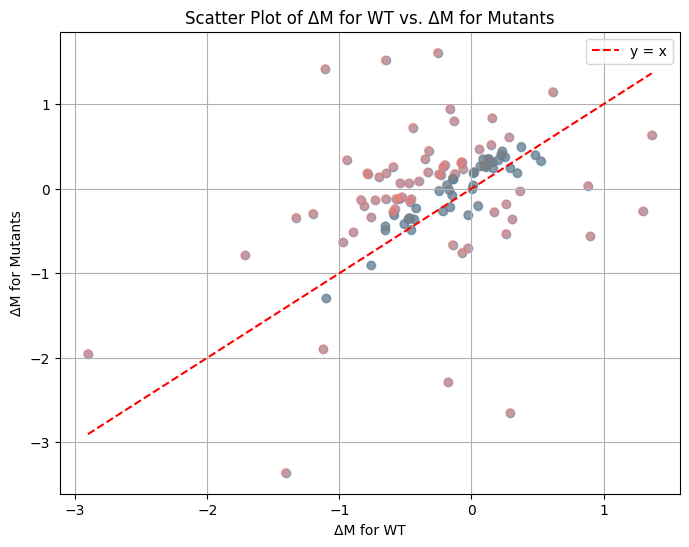

In [ ]:

import matplotlib.pyplot as plt
import numpy as np



# First Extract the data for the scatter plot
x = metabolic_diff_df['WT_Metabolic_Difference'][1:]  # Exclude the first row (header)
y = metabolic_diff_df['Mutant_Metabolic_Difference'][1:]  # Exclude the first row (header)
x = pd.to_numeric(x)
y = pd.to_numeric(y)

# 2. Create the scatter plot
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.scatter(x, y, alpha=0.5)  # Adjust alpha for transparency
plt.xlabel('ΔM for WT')
plt.ylabel('ΔM for Mutants')
plt.title('Scatter Plot of ΔM for WT vs. ΔM for Mutants')

# 3.Fit a line with y-intercept = 0 and slope = 1
x_line = np.linspace(min(x), max(x), 100)  # Generate x values for the line
y_line = x_line  # y = x for slope = 1 and y-intercept = 0
plt.plot(x_line, y_line, color='red', linestyle='--', label='y = x')  # Plot the line


# Calculate residuals
residuals = y - x  # Since y = x is the fitted line

# Define cutoff
cutoff = 0.3

# Creating a color array based on residuals
colors = np.where(np.abs(residuals) <= cutoff, 'grey', 'salmon')

# Creating scatter plot with colored points
plt.scatter(x, y, c=colors, alpha=0.5)


plt.legend()  # Show legend
plt.grid(True)  # Add gridlines
plt.show()  # Display the plot


For the visuals(Plot) above you see it has a positive corrolation